<a href="https://colab.research.google.com/github/xsebash/Avanzado-IA/blob/main/TobiasReboredo_SebastianHuberman_4D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
#files.upload()
#https://www.kaggle.com/datasets/krishnaraj30/finance-loan-approval-prediction-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


REGRESION LOGISTICA NUM

In [ ]:
#df_numeric = df.select_dtypes(include=['number'])
#print(df_numeric.head())

In [ ]:
cols_numeric= ("ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term" )
df=pd.read_csv("/content/drive/MyDrive/dataset/train.csv", usecols=cols_numeric)

extraemos las columnas importantes como los ingresos y el monto del préstamo.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
cols = ("Loan_ID","Married", "Dependents", "Education", "Self_Employed","ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term","Loan_Status" )
df=pd.read_csv("/content/drive/MyDrive/dataset/train.csv", usecols=cols)
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,Y
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,N
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,Y


In [ ]:
print (df['LoanAmount'])

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


In [ ]:
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0             5849                0.0         NaN             360.0
1             4583             1508.0       128.0             360.0
2             3000                0.0        66.0             360.0
3             2583             2358.0       120.0             360.0
4             6000                0.0       141.0             360.0


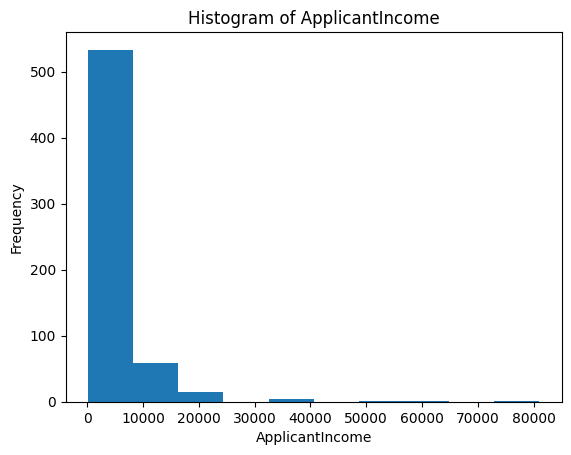

In [ ]:
plt.hist(df_numeric['ApplicantIncome'])
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Histogram of ApplicantIncome')
plt.show()

In [ ]:
X = df_numeric[["ApplicantIncome",  "CoapplicantIncome" , "LoanAmount",  "Loan_Amount_Term"]]
y = df["Loan_Status"]

print(X.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(614, 4)


((491, 4), (123, 4), (491,), (123,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Crear un objeto con el promedio de cada columna
imputer = SimpleImputer(strategy='mean')

# Aplica el "imputer" a los datos de entrenamiento para reemplazar valores faltantes
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Creamos el modelo de regresion logistica
lr_model = LogisticRegression()

# Entrenamos el modelo utilizando los datos de entrenamiento sin valores faltantes
lr_model.fit(X_train_imputed, y_train)

# Prediccion
y_pred = lr_model.predict(X_test_imputed)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar la columna Loan_Status (de 'Y'/'N' a 1/0)
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# Verificar los cambios
print(df['Loan_Status'].value_counts())


Loan_Status
1    422
0    192
Name: count, dtype: int64


In [ ]:
y_pred = lr_model.predict(X_test_imputed)
print(y_pred)

   # Convertimos y_pred a enteros


['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [ ]:
import numpy as np
y_pred = lr_model.predict(X_test_imputed)
print(y_pred)

# Convertir 'Y', 'N' a binario
y_pred = [1 if p == 'Y' else 0 for p in y_pred]

# Redondear a enteros
y_pred = np.array(y_pred).astype(np.int64)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

y_pred = lr_model.predict(X_test_imputed)

y_pred = label_encoder.fit_transform(y_pred)

# Calcular error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6504065040650406


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = lr_model.predict(X_train_imputed)

# Convertimos categorías en números
label_encoder = LabelEncoder()

# Convertimmos categorias a numeros
y_train = label_encoder.fit_transform(y_train)

y_pred = label_encoder.fit_transform(y_pred)

# Calculamos la Accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6965376782077393


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = lr_model.predict(X_train_imputed)

label_encoder = LabelEncoder()

y_pred = label_encoder.fit_transform(y_pred)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6965376782077393


In [ ]:
y_test.shape, y_pred.shape

((123,), (491,))

In [ ]:

X_test_imputed = imputer.transform(X_test)

y_pred = lr_model.predict(X_test_imputed)



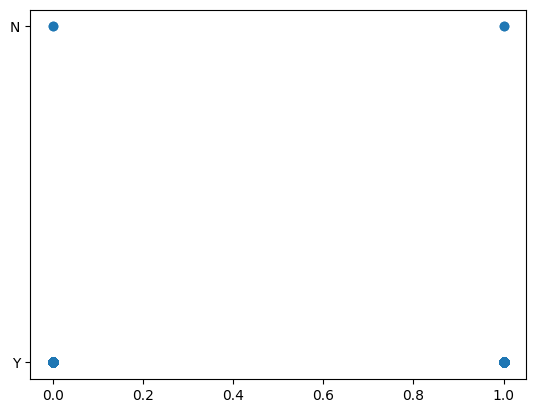

In [ ]:
plt.scatter(y_train, lr_model.predict(X_train_imputed))

In [ ]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")


Shape of y_test: (123,)
Shape of y_pred: (123,)


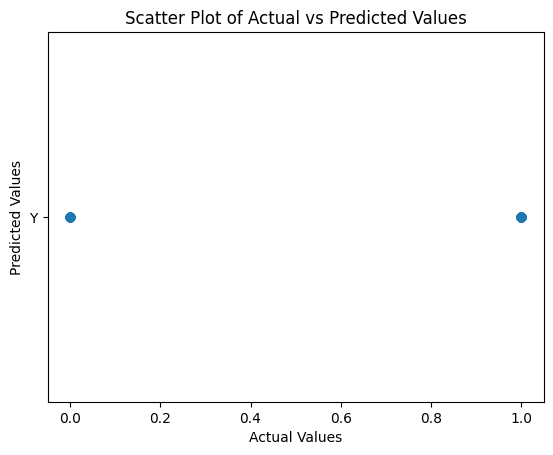

In [ ]:

if y_test.shape == y_pred.shape:
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Scatter Plot of Actual vs Predicted Values")
else:
    print(f"Shapes are not compatible for plotting: y_test shape is {y_test.shape}, y_pred shape is {y_pred.shape}")

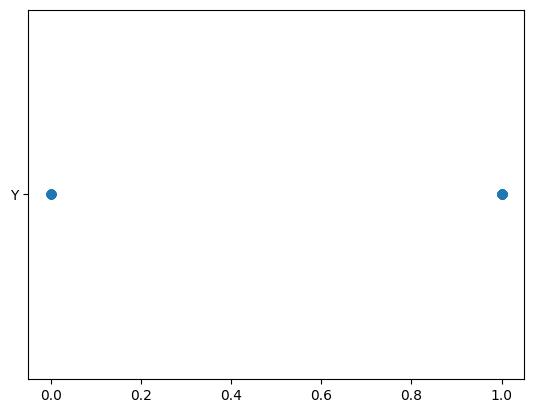

In [ ]:
plt.scatter(y_test, y_pred)
# plt.plot([0, 1000000], [0, 1000000], "--k")

In [ ]:
Income_dataset = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
Income_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

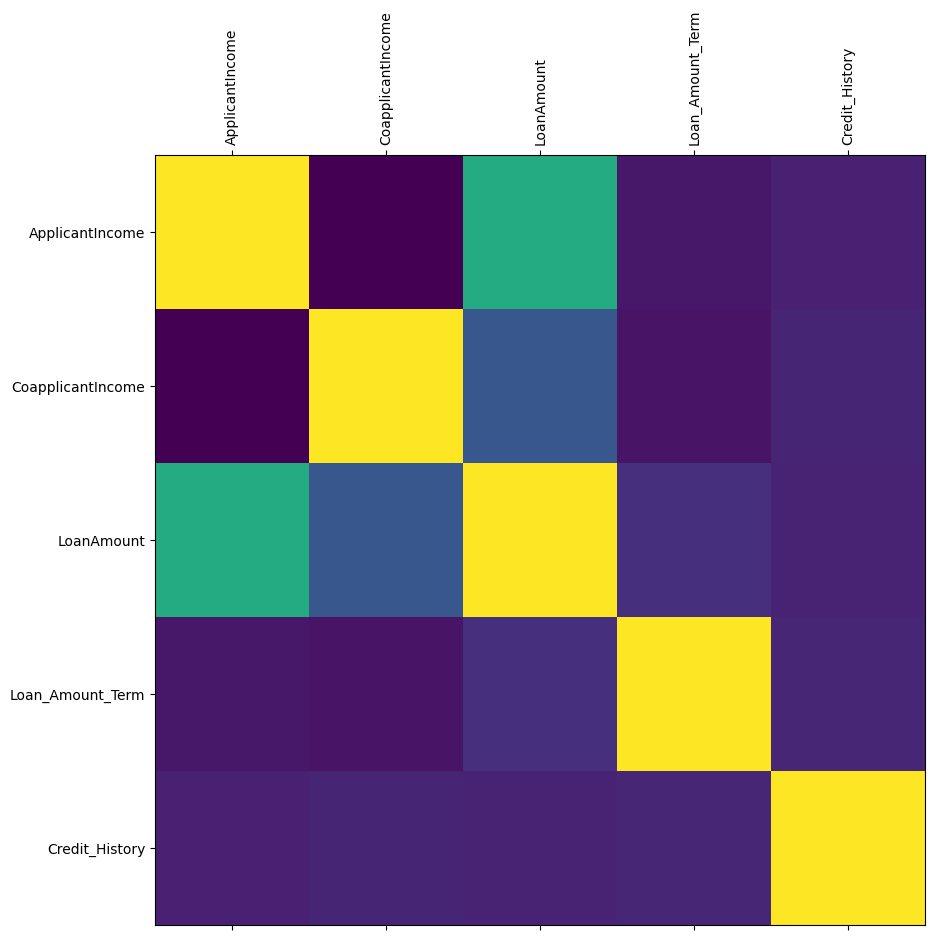

In [ ]:
# Calcular correlaciones
income = Income_dataset.select_dtypes(include=['number']).corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(income)
plt.xticks(range(len(income.columns)), income.columns)
plt.xticks(rotation=90)
plt.yticks(range(len(income.columns)), income.columns)

plt.show()

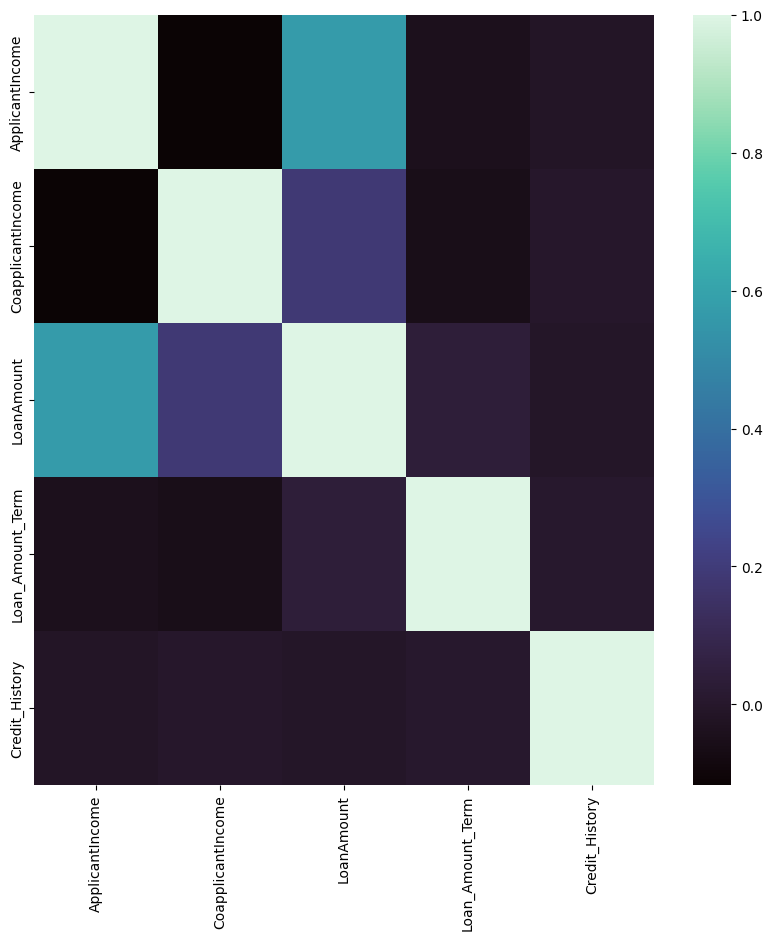

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(income, ax=ax, cmap="mako")
plt.show()

Credit History es el historial de la tarjeta de credito, osea si hay pagos, cuantos son, y si fueron pagados en tiempo y forma.
Loan Amount Term es el tiempo por el que se presta el dinero.
Loan Amount es la cantidad de tiempo que se pidio al banco.
Coapplicant income es el ingreso del coaplicante del prestamo, osea cuando un prestamo se paga entre varias personas.
Applicant income es el ingreso del aplicante principal del prestamo.
Las principales relaciones son la cantidad del prestamo con el ingreso del aplicante y el coaplicante por razones obvias, ademas de eso no parece haber muchas relaciones entre los datos.

In [ ]:
Income_dataset["ApplicantIncome"].value_counts()

,count
ApplicantIncome,
2500,9
4583,6
6000,6
2600,6
3333,5
...,...
3244,1
4408,1
3917,1


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

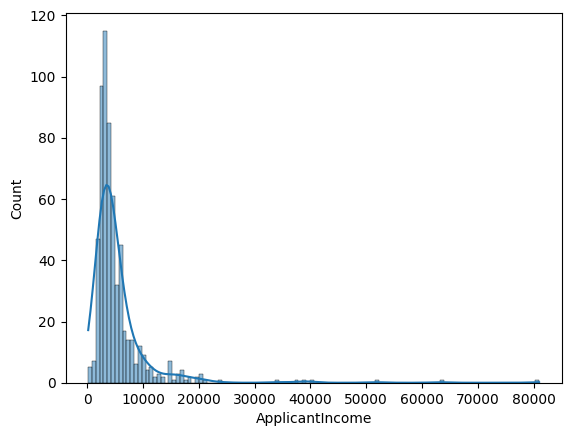

In [ ]:
sns.histplot(Income_dataset["ApplicantIncome"], kde=True)

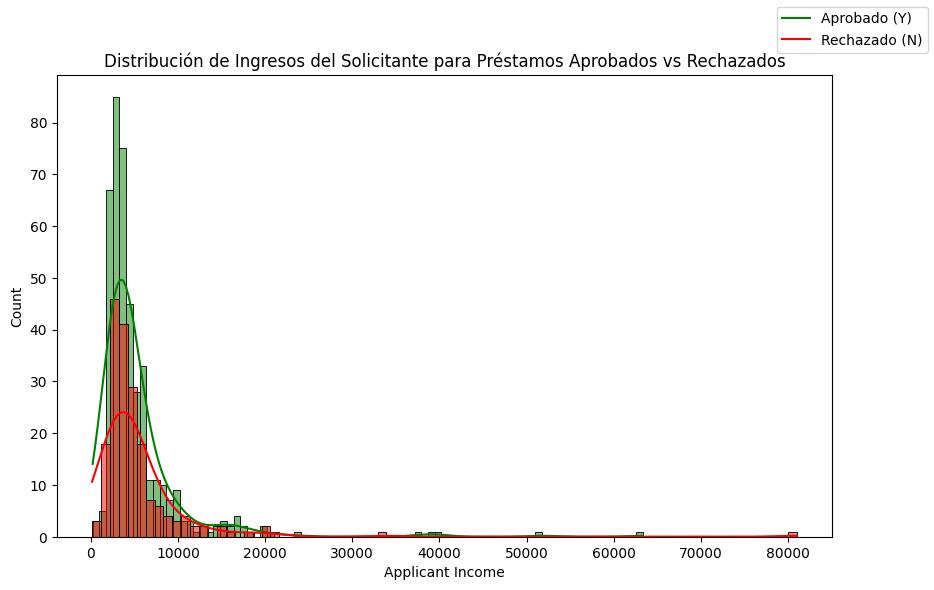

In [ ]:
ds_approved = Income_dataset[Income_dataset["Loan_Status"] == 'Y']
ds_rejected = Income_dataset[Income_dataset["Loan_Status"] == 'N']

fig, ax = plt.subplots(figsize=(10, 6))

# Usamos 'ApplicantIncome' como la columna relevante
sns.histplot(ds_approved["ApplicantIncome"], kde=True, color="green", ax=ax)
sns.histplot(ds_rejected["ApplicantIncome"], kde=True, color="red", ax=ax)

# Ajustamos la leyenda
fig.legend(labels=["Aprobado (Y)", "Rechazado (N)"])
plt.title("Distribución de Ingresos del Solicitante para Préstamos Aprobados vs Rechazados")
plt.xlabel("Applicant Income")
plt.show("distribución de Ingreso Anual para Préstamos Aprobados vs Rechazados")
plt.show()

<ipython-input-31-73a674f0cf18>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Denied", "Approved"]) # Set labels for x-axis ticks


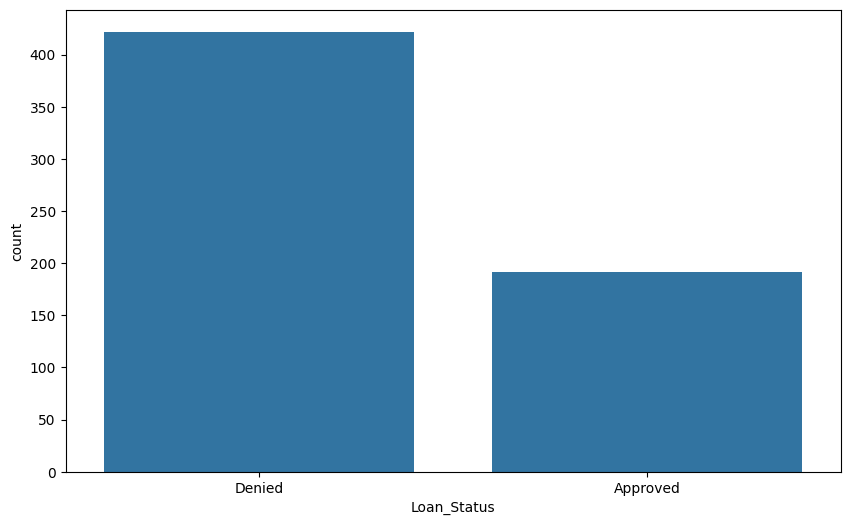

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x="Loan_Status", data=Income_dataset, ax=ax)

ax.set_xticklabels(["Denied", "Approved"])

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
# Elimina las filas que tienen valores faltantes del entrenamiento
X_train_no_nan = X_train.dropna()
y_train_no_nan = y_train[X_train.notna().all(axis=1)]

# Elimina las filas que tienen valores faltantes de los datos de prueba
X_test_no_nan = X_test.dropna()
y_test_no_nan = y_test[X_test.notna().all(axis=1)]



# Entrena el modelo
log_model = LogisticRegression()
log_model.fit(X_train_no_nan, y_train_no_nan)

LogisticRegression()

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train_no_nan, y_train_no_nan)
y_pred = log_model.predict(X_test_no_nan)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_no_nan, y_pred)
mse

0.33043478260869563

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_no_nan = le.fit_transform(y_train_no_nan)

# calcular el error cuadrático medio entre los valores reales y las predicciones
mean_squared_error(y_train_no_nan, log_model.predict(X_train_no_nan))

0.2915766738660907

In [ ]:
y_test_no_nan.shape, y_pred.shape

((115,), (115,))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


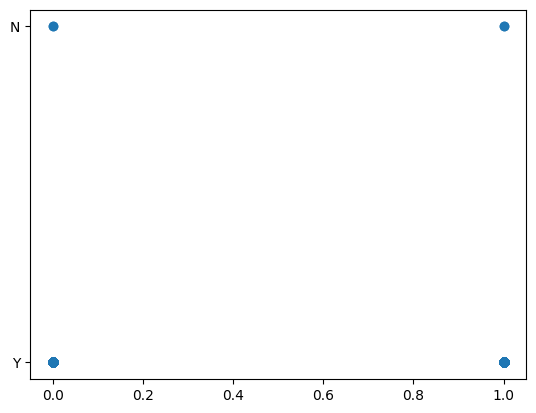

In [ ]:
plt.scatter(y_train_no_nan, lr_model.predict(X_train_no_nan))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


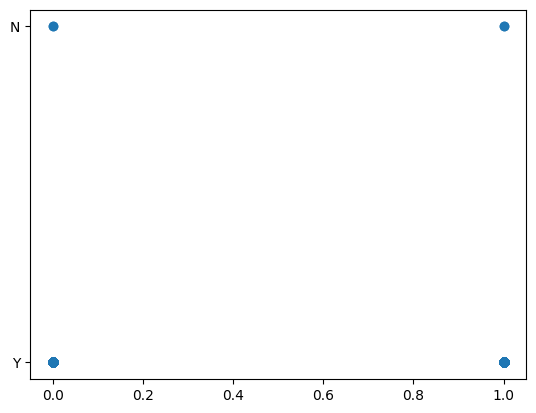

In [ ]:
plt.scatter(y_train_no_nan, lr_model.predict(X_train_no_nan))

In [ ]:
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Coefficients: [[-3.60084953e-06 -3.15303005e-05 -4.81733494e-05  2.57422367e-03]]
Intercept: [1.73071004e-05]


In [ ]:
X_df = pd.DataFrame(Income_dataset.values, columns=Income_dataset.columns)
y_df = pd.DataFrame(Income_dataset["Loan_Status"], columns=["Loan_Status"])

Income_ds = pd.concat([X_df, y_df], axis=1)
Income_ds
Income_ds = Income_ds.drop('Loan_Status', axis=1)

In [ ]:
Income_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:

import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

y_pred_proba = lr_model.predict_proba(X_test_no_nan) # Obtain probabilities for each class

# Verifica la forma de y_pred_proba y y_test_no_nan
print(f"Shape of y_pred_proba: {y_pred_proba.shape}")
print(f"Shape of y_test_no_nan: {y_test_no_nan.shape}")

# Revisa los valores únicos en y_test_no_nan y en la variable objetivo
print(f"Unique values in y_test_no_nan: {np.unique(y_test_no_nan)}")


Shape of y_pred_proba: (115, 2)
Shape of y_test_no_nan: (115,)
Unique values in y_test_no_nan: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9913333333333334

Accuracy: 0.6695652173913044


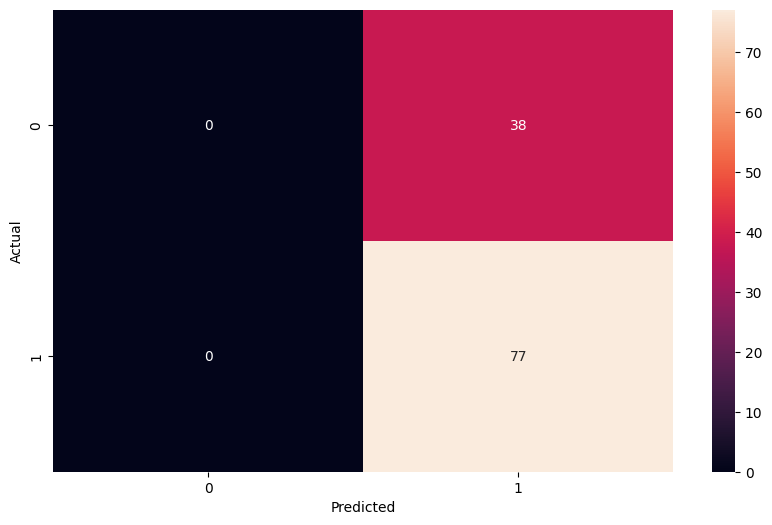

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test_no_nan, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test_no_nan, y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

FOREST NUMERIC


In [ ]:
 !pip3 install pydotplus
# !brew install graphviz
# !pip install -U pydotplus

import pydotplus
from six import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz


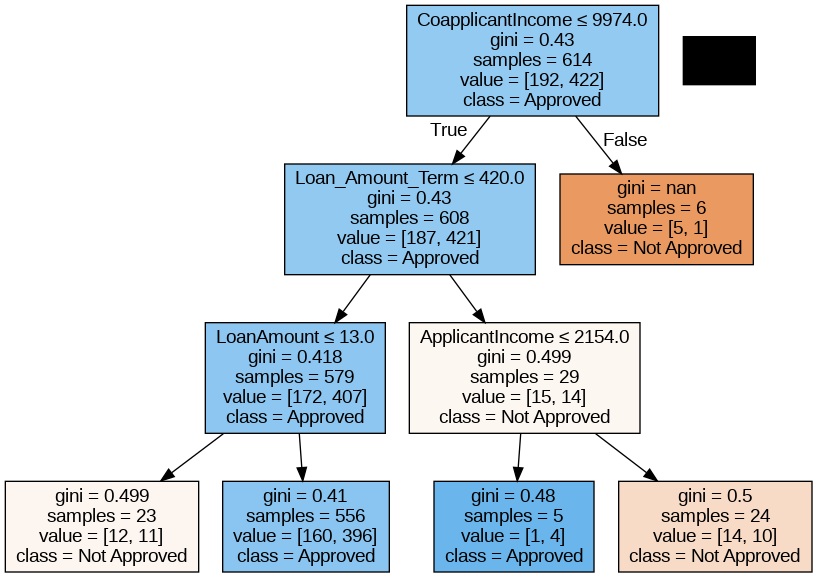

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import pydotplus
from io import StringIO

# Función para dibujar el árbol
def dibujar_arbol(clf, c_name=["Not Approved", "Approved"], f_name=[
    "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"
]):
    dot_data = StringIO()

    export_graphviz(
        clf,
        out_file=dot_data,
        filled=True,
        class_names=c_name,
        feature_names=f_name,
        special_characters=True,
    )

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

# Entrenamiento del árbol
arbol = DecisionTreeClassifier(max_depth=3)

# Ajusta los datos según las características correctas
X = Income_dataset[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]]
y = Income_dataset["Loan_Status"].map({"N": 0, "Y": 1})  # Ajusta si tus valores son diferentes

# Entrenamiento del modelo
arbol.fit(X, y)

# Dibujar el árbol
dibujar_arbol(arbol)


Accuracy: 0.6521739130434783
              precision    recall  f1-score   support

           0       0.47      0.37      0.41        38
           1       0.72      0.79      0.75        77

    accuracy                           0.65       115
   macro avg       0.59      0.58      0.58       115
weighted avg       0.63      0.65      0.64       115



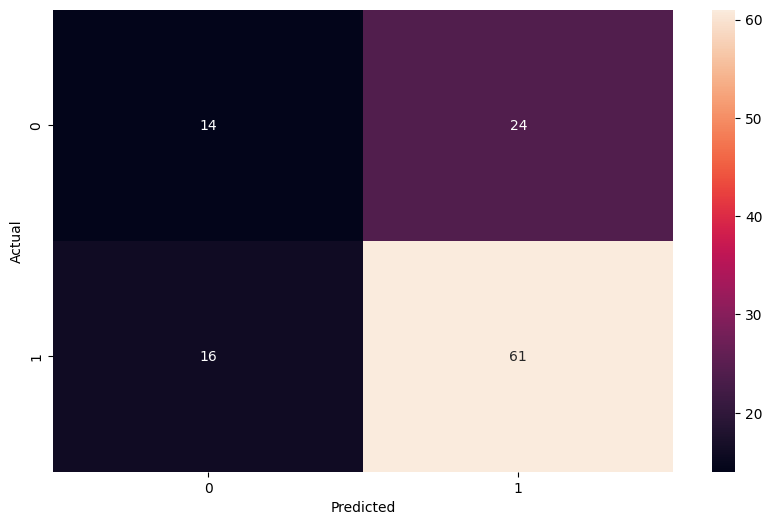

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_no_nan, y_train_no_nan)


y_pred = dt_model.predict(X_test_no_nan)

accuracy = accuracy_score(y_test_no_nan, y_pred)
cm = confusion_matrix(y_test_no_nan, y_pred)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

print(classification_report(y_test_no_nan, y_pred))

In [ ]:
y_pred = arbol.predict(X_test_no_nan) # Usa el modelo para predecir

accuracy = accuracy_score(y_test_no_nan, y_pred) # Calcular accuracy

print("Accuracy:", accuracy)

Accuracy: 0.6608695652173913


In [ ]:
y_pred_proba = arbol.predict_proba(X_test_no_nan)[:, 1]

roc_auc = roc_auc_score(y_test_no_nan, y_pred_proba)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.5061517429938482


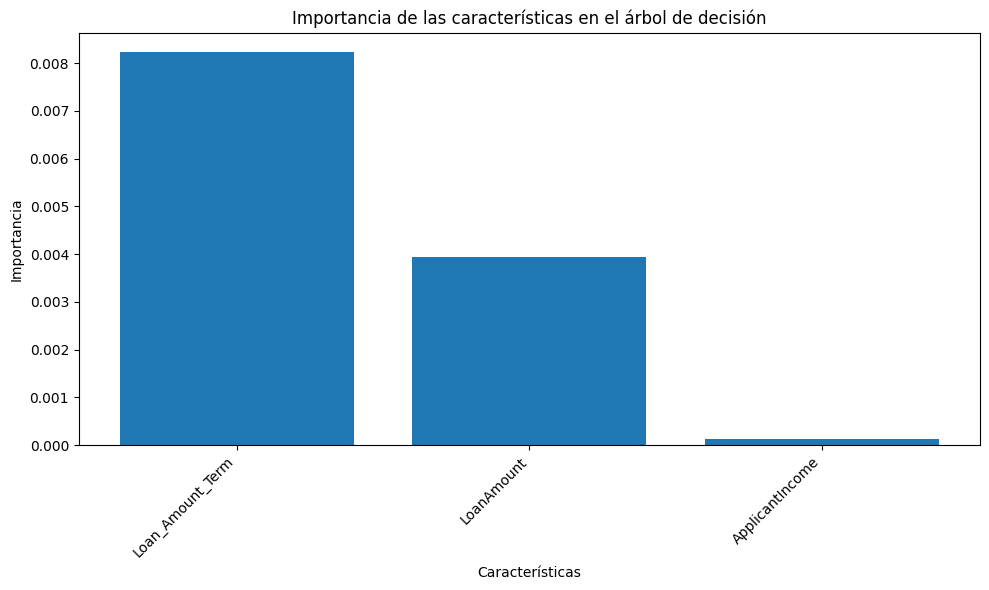

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtenemos la importancia de las características del modelo
importances = arbol.feature_importances_

# Crea un DataFrame para visualizar las importancias junto con los nombres de las características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Crea un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las características en el árbol de decisión")
plt.tight_layout()
plt.show()

LOGISTIC CATE Y NUMERIC

In [ ]:
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [ ]:
import pandas as pd

# Crea una copia del DataFrame original
encoded_df = Income_dataset.copy()

encoded_df = pd.get_dummies(encoded_df, columns=categorical_columns)

label_encoder = LabelEncoder()
encoded_df.loc[:, 'Loan_Status'] = label_encoder.fit_transform(encoded_df['Loan_Status'])
# Convierte la variable de estado del préstamo en números para facilitar el análisis
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

X_d = encoded_df[numeric_columns + list(encoded_df.columns.difference(numeric_columns + categorical_columns))]
y_d = encoded_df[['Loan_Status']].copy()

# Continúa con la separación de los datos y el entrenamiento del modelo

In [ ]:
from sklearn.model_selection import train_test_split # Importar la funcion correcta

#encoded_ds = pd.concat([X_d, y_d], axis=1)

encoded_df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,NaN,360.0,1.0,1,False,True,True,False,True,False,True,False,False,False,True
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,True,False,True,False,True,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,True,False,False,True,False,False,True
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,False,True,True,False,False,False,True
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,True,False,True,False,True,False,False
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,1,False,True,False,True,True,False,True,False,True,False,False
611,LP002983,1,8072,240.0,253.0,360.0,1.0,1,False,True,False,True,True,False,True,False,False,False,True
612,LP002984,2,7583,0.0,187.0,360.0,1.0,1,False,True,False,True,True,False,True,False,False,False,True


In [ ]:
print(df.columns)

Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status'],
      dtype='object')


In [ ]:
# Convertir las listas
numeric_df = pd.DataFrame(numeric_columns)
categorical_df = pd.DataFrame(categorical_columns)

df_combined = pd.concat([numeric_df, categorical_df], axis=1)

print(df_combined.head())

                   0              0
0    ApplicantIncome         Gender
1  CoapplicantIncome        Married
2         LoanAmount      Education
3   Loan_Amount_Term  Self_Employed
4                NaN  Property_Area


In [ ]:
# Crea y_d a partir de encoded_df y aplica LabelEncoder
y_d = encoded_df[['Loan_Status']].copy()  # copia de la columna Loan_Status para usarla como variable objetivo

label_encoder = LabelEncoder()
y_d.loc[:, 'Loan_Status'] = label_encoder.fit_transform(y_d['Loan_Status'])

# Seguir entrenando el modelo


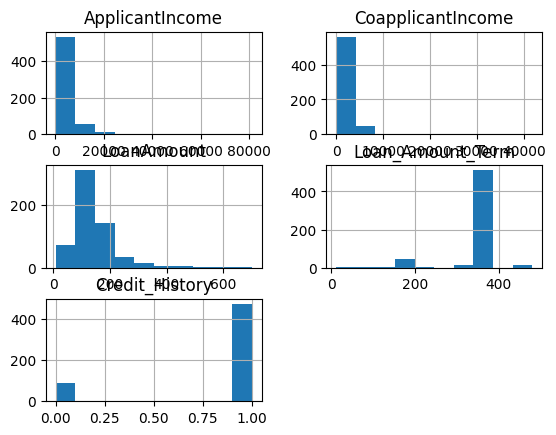

In [ ]:
#Income_dataset_ds.hist()
X_d.hist()
plt.show()


In [ ]:

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.2, random_state=seed)


In [ ]:
# Fijarse  los tipos de datos
print(X_train.dtypes)

for col in X_train.columns:
   if X_train[col].dtype == 'object':
     print(f'{col}: {X_train[col].unique()[:20]}')

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Dependents                  object
Education_Graduate            bool
Education_Not Graduate        bool
Gender_Female                 bool
Gender_Male                   bool
Loan_ID                     object
Loan_Status                 object
Married_No                    bool
Married_Yes                   bool
Property_Area_Rural           bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
Self_Employed_No              bool
Self_Employed_Yes             bool
dtype: object
Dependents: ['0' '2' '3+' '1' nan]
Loan_ID: ['LP001273' 'LP001316' 'LP001758' 'LP002537' 'LP002493' 'LP002191'
 'LP001264' 'LP001050' 'LP001639' 'LP001935' 'LP002706' 'LP002862'
 'LP002369' 'LP001574' 'LP002319' 'LP002699' 'LP001020' 'LP002175'
 'LP002555' 'LP002367']
Loan_Status: [0 1]


In [ ]:
X_train.isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,16
Loan_Amount_Term,12
Credit_History,40
Dependents,11
Education_Graduate,0
Education_Not Graduate,0
Gender_Female,0
Gender_Male,0


In [ ]:
indices_to_drop = X_train[X_train.isnull().any(axis=1)].index.union(y_train[y_train.isnull().any(axis=1)].index)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(491, 19)
(491, 1)


In [ ]:
y_d.iloc[:, 0].dtype
y_d.iloc[:, 0].unique()
y_d = y_d.astype(int)

In [ ]:
X_d = X_d.drop('Loan_ID', axis=1)

In [ ]:
print(X_d.isnull().sum())  # Buscar valores NaN

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Dependents                 15
Education_Graduate          0
Education_Not Graduate      0
Gender_Female               0
Gender_Male                 0
Loan_Status                 0
Married_No                  0
Married_Yes                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
Self_Employed_No            0
Self_Employed_Yes           0
dtype: int64


In [ ]:
# Convertir 'Dependents' a numerico, convirtiendo valores no numéricos a NaN
X_d['Dependents'] = pd.to_numeric(X_d['Dependents'], errors='coerce')

# Calcular la media y llenar los valores NaN con esa media
X_d['Dependents'] = X_d['Dependents'].fillna(X_d['Dependents'].mean())

In [ ]:
X_d['LoanAmount'] = X_d['LoanAmount'].fillna(X_d['LoanAmount'].mean())
X_d['Loan_Amount_Term'] = X_d['Loan_Amount_Term'].fillna(X_d['Loan_Amount_Term'].mean())
X_d['Credit_History'] = X_d['Credit_History'].fillna(X_d['Credit_History'].mean())
X_d['Dependents'] = X_d['Dependents'].fillna(X_d['Dependents'].mean())

In [ ]:

# Reemplazar '3+' con 4

X_d['Dependents'] = X_d['Dependents'].replace('3+', '4')

X_d['Dependents'] = X_d['Dependents'].astype(float)
X_test['Dependents'] = X_test['Dependents'].replace('3+', '4')

X_test['Dependents'] = pd.to_numeric(X_test['Dependents'], errors='coerce')
# Entrenar modelo
log_model_d = LogisticRegression(max_iter=1000)
#log_model_d.fit(X_train, y_train.values.ravel())
log_model_d.fit(X_d, y_d.values.ravel())

LogisticRegression(max_iter=1000)

In [ ]:
X_test['Loan_Amount_Term'] = X_test['Loan_Amount_Term'].fillna(X_test['Loan_Amount_Term'].mean())
X_test['Credit_History'] = X_test['Credit_History'].fillna(X_test['Credit_History'].mean())
X_test['Dependents'] = X_test['Dependents'].fillna(X_test['Dependents'].mean())
X_test['LoanAmount'] = X_test['LoanAmount'].fillna(X_test['LoanAmount'].mean())

In [ ]:
print(X_test.isnull().sum())

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Dependents                 0
Education_Graduate         0
Education_Not Graduate     0
Gender_Female              0
Gender_Male                0
Loan_ID                    0
Loan_Status                0
Married_No                 0
Married_Yes                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Self_Employed_No           0
Self_Employed_Yes          0
dtype: int64


In [ ]:
X_test = X_test.drop('Loan_ID', axis=1)

In [ ]:


log_model_d.fit(X_d, y_d.values.ravel())

# Predecir usando el modelo entrenado
y_pred = log_model_d.predict(X_test)

In [ ]:
y_test = y_test.astype(int)

Accuracy: 1.0


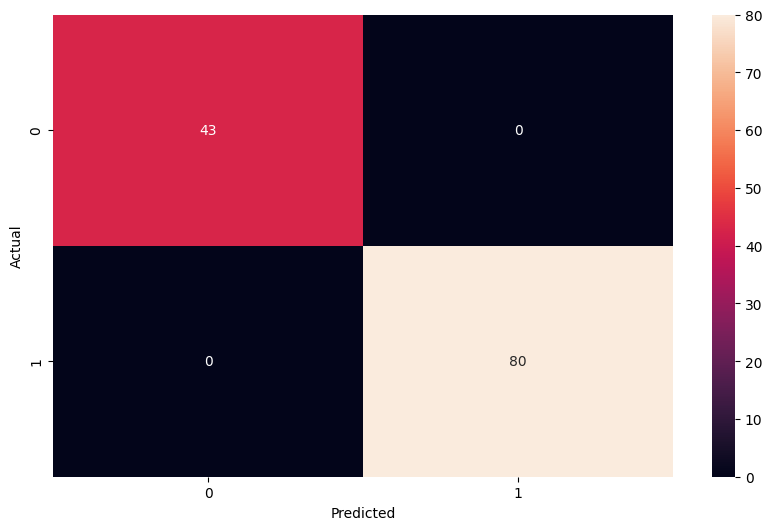

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [ ]:


# Calcular AUC_ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)



AUC-ROC: 1.0


ARBOL NUMERIC Y CATEGORIC

In [ ]:
categorical_columns

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [ ]:
X_d.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Dependents',
       'Education_Graduate', 'Education_Not Graduate', 'Gender_Female',
       'Gender_Male', 'Loan_Status', 'Married_No', 'Married_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [ ]:
y_d

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



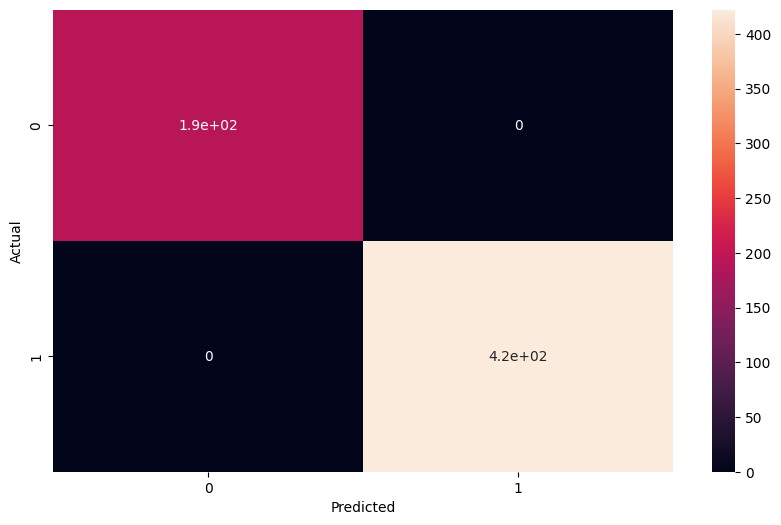

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model = DecisionTreeClassifier()
dt_model.fit(X_d, y_d)


y_pred = dt_model.predict(X_d)

accuracy = accuracy_score(y_d, y_pred)
cm = confusion_matrix(y_d, y_pred)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

print(classification_report(y_d, y_pred))

Decision Tree Accuracy: 0.8211382113821138


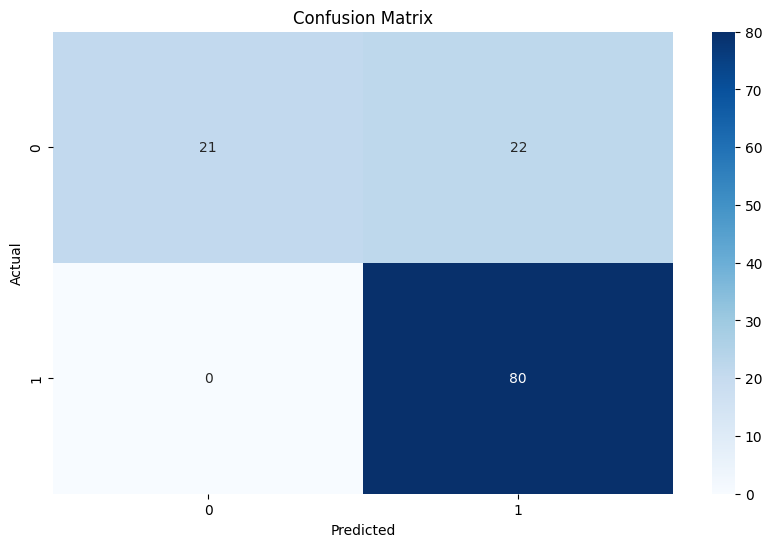

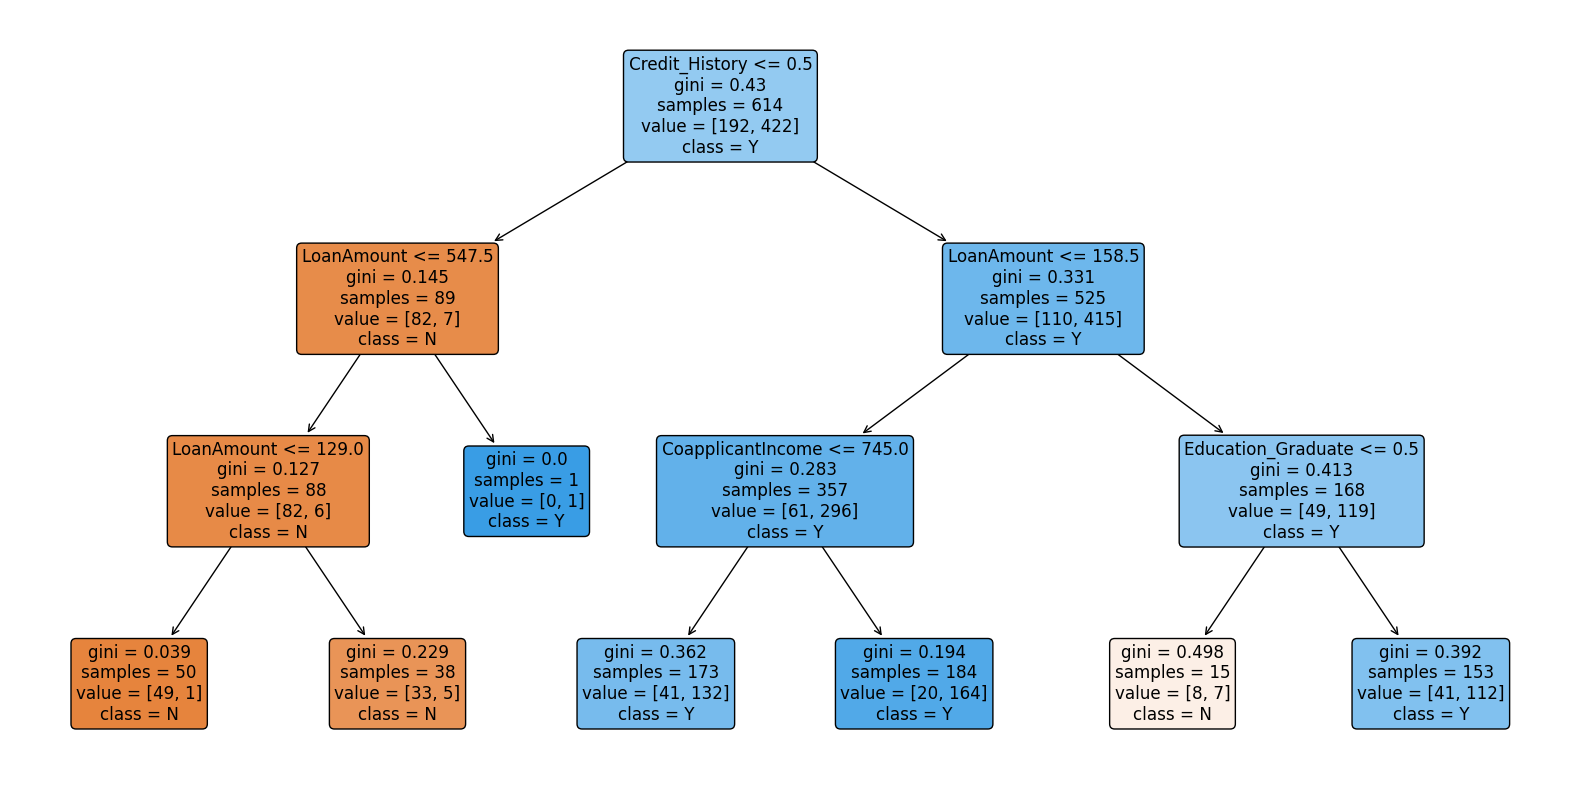

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
encoded_df = pd.get_dummies(Income_dataset, columns=categorical_columns)

# Eliminar columnas no características
encoded_df = encoded_df.drop(['Loan_ID'], axis=1)

encoded_df['Dependents'] = encoded_df['Dependents'].replace('3+', 4).astype(float)

X_d = encoded_df.drop(['Loan_Status'], axis=1)  # Elimmina resultados de  loan_status
y_d = encoded_df['Loan_Status']  # Loan_Status variable objetivo

# Convertir la variable objetivo a números
label_encoder = LabelEncoder()
y_d = label_encoder.fit_transform(y_d)

# Crear y entrenar modelo
arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
arbol.fit(X_d, y_d)

for col in categorical_columns:
    if col not in X_test.columns:
        X_test[col] = 'Not Specified'  # Placeholder en columnas vacias

encoded_test_df = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

encoded_test_df = encoded_test_df.reindex(columns=X_d.columns, fill_value=0)

y_test_encoded = y_test.astype(int)

# Asegurarse que las longitudes sean iguales antes de entrenar
if len(y_test_encoded) == encoded_test_df.shape[0]:
    # Predecir
    y_pred_tree = arbol.predict(encoded_test_df)

    # Accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred_tree)
    print("Decision Tree Accuracy:", accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred_tree)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Visualizar el arbol de decisiones
    plt.figure(figsize=(20, 10))
    tree.plot_tree(arbol, filled=True, feature_names=X_d.columns, class_names=label_encoder.classes_, rounded=True)
    plt.show()
else:
    print("The lengths of y_test_encoded and predictions do not match.")


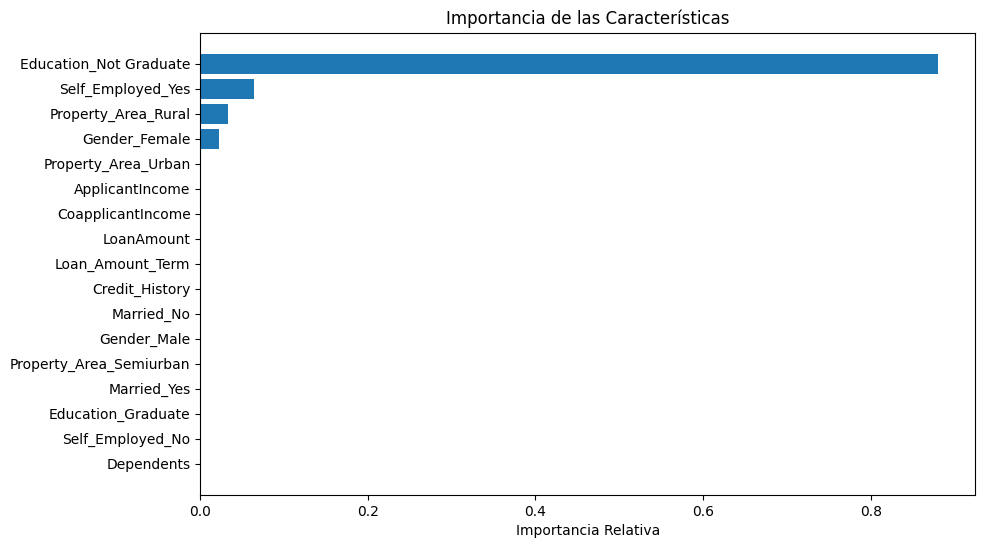

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = arbol.feature_importances_[::-1]
indices = np.argsort(importances)

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.barh(range(X_d.shape[1]), importances[indices], align="center")
plt.yticks(range(X_d.shape[1]), X_d.columns[indices])
plt.xlabel("Importancia Relativa")
plt.show()


In [ ]:


roc_auc = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])
print("AUC-ROC:", roc_auc)


AUC-ROC: 0.7354651162790697
